In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/poland-cars-for-sale-dataset/Car_sale_ads.csv


# Importando o dataset

In [3]:
df = pd.read_csv('/kaggle/input/poland-cars-for-sale-dataset/Car_sale_ads.csv')
df.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


## Conhecendo o dataset:

In [4]:
df.shape

(208304, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   float64
 14  Driv

In [6]:
df.Currency.unique()

array(['PLN', 'EUR'], dtype=object)

In [7]:
df.loc[df['Currency'] == 'EUR']

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
141,141,18448,EUR,New,Aixam,Other,NaN,NaN,2021,1.0,...,Automatic,small_cars,2.0,other,France,NaN,NaN,03/05/2021,"Borowska 258 - 50-558 Wrocław, Dolnośląskie (P...",[]
142,142,17731,EUR,New,Aixam,Other,NaN,NaN,2021,1.0,...,Automatic,small_cars,2.0,other,NaN,NaN,NaN,03/05/2021,"Borowska 258 - 50-558 Wrocław, Dolnośląskie (P...",[]
143,143,14143,EUR,New,Aixam,Other,NaN,NaN,2021,1.0,...,Automatic,small_cars,2.0,other,France,NaN,NaN,03/05/2021,"Borowska 258 - 50-558 Wrocław, Dolnośląskie (P...",[]
144,144,13426,EUR,New,Aixam,Other,NaN,NaN,2021,1.0,...,Automatic,small_cars,2.0,other,France,NaN,NaN,03/05/2021,"Borowska 258 - 50-558 Wrocław, Dolnośląskie (P...",[]
152,152,9673,EUR,New,Aixam,Other,NaN,NaN,2021,1.0,...,Automatic,small_cars,3.0,white,NaN,NaN,NaN,04/05/2021,"Borowska 258 - 50-558 Wrocław, Dolnośląskie (P...","['Central locking', 'Electric front windows', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203703,203703,28500,EUR,Used,Volvo,S60,Polestar,II (2010-),2017,18000.0,...,Automatic,sedan,4.0,blue,Canada,NaN,NaN,03/05/2021,"Radom, Mazowieckie","['ABS', 'Electric front windows', 'Drivers air..."
208176,208176,18900,EUR,Used,Volvo,XC 90,ii-2014,NaN,2015,115000.0,...,Automatic,SUV,5.0,other,NaN,Yes,NaN,26/04/2021,"katowicka 68 - 43-100 Tychy, Śląskie (Polska)","['ABS', 'Electric front windows', 'Drivers air..."
208205,208205,7200,EUR,Used,Volvo,V40,NaN,II (2012-),2017,54000.0,...,Manual,compact,5.0,other,NaN,Yes,NaN,26/04/2021,"katowicka 68 - 43-100 Tychy, Śląskie (Polska)","['ABS', 'Electric front windows', 'Drivers air..."
208232,208232,8900,EUR,Used,Volvo,XC 60,NaN,I (2008-2017),2016,79000.0,...,Automatic,SUV,5.0,other,Belgium,Yes,NaN,26/04/2021,"katowicka 68 - 43-100 Tychy, Śląskie (Polska)","['ABS', 'Electric front windows', 'Drivers air..."


Excluindo registros em Euro:

In [8]:
veiculo_em_euro = df.loc[df['Currency'] == 'EUR'].index
df = df.drop(veiculo_em_euro)
df.shape

(208034, 25)

In [9]:
dados = df[['Price', 'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3', 'Doors_number']]
dados.head()

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number
0,86200,2021,1.0,145.0,1400.0,3.0
1,43500,1974,59000.0,75.0,1100.0,2.0
2,44900,2018,52000.0,180.0,1368.0,3.0
3,39900,2012,29000.0,160.0,1368.0,3.0
4,97900,2021,600.0,165.0,1368.0,3.0


In [10]:
colunas = {
    'Price' : 'Preco',
    'Production_year' : 'Ano_fabricacao',
    'Mileage_km' : 'Km_rodado',
    'Power_HP' : 'Potencia_motor',
    'Displacement_cm3' : 'Tamanho_motor',
    'Doors_number' : 'Numero_portas'
}

dados = dados.rename(columns = colunas)
dados.head()

,Preco,Ano_fabricacao,Km_rodado,Potencia_motor,Tamanho_motor,Numero_portas
0,86200,2021,1.0,145.0,1400.0,3.0
1,43500,1974,59000.0,75.0,1100.0,2.0
2,44900,2018,52000.0,180.0,1368.0,3.0
3,39900,2012,29000.0,160.0,1368.0,3.0
4,97900,2021,600.0,165.0,1368.0,3.0


In [11]:
dados = dados.dropna()
dados.shape

(203873, 6)

In [12]:
dados.Numero_portas.unique()

array([ 3.,  2.,  5.,  4.,  6.,  1.,  7.,  9., 55.])

In [13]:
df.loc[df['Doors_number'] > 50]

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
186721,186721,54900,PLN,Used,Volkswagen,Golf,NaN,VII (2012-2020),2017,64000.0,...,Manual,station_wagon,55.0,black,Poland,Yes,31/08/2017,04/05/2021,"Prymasa Tysiąclecia 103 - 01-424 Warszawa, Maz...","['ABS', 'Alloy wheels', 'Rear parking sensors'..."
207984,207984,119900,PLN,Used,Volvo,S90,NaN,NaN,2017,98401.0,...,Automatic,sedan,55.0,brown,Poland,Yes,20/12/2017,04/05/2021,"Kaliska 28 - 61-131 Poznań, Nowe Miasto (Polska)","['ABS', 'Central locking', 'Front parking sens..."


In [14]:
dados.loc[dados['Numero_portas'] > 5]

,Preco,Ano_fabricacao,Km_rodado,Potencia_motor,Tamanho_motor,Numero_portas
17907,53000,2007,269000.0,450.0,5200.0,6.0
36386,48000,1999,282000.0,315.0,5665.0,6.0
37618,88900,2017,70308.0,291.0,3600.0,6.0
45561,24900,2014,167000.0,90.0,1461.0,6.0
45840,9999,2010,142200.0,105.0,1598.0,6.0
46656,34900,2016,88000.0,90.0,1461.0,6.0
50133,13900,2009,191000.0,75.0,1400.0,6.0
52014,74900,2018,58768.0,125.0,1598.0,6.0
52544,45800,2012,135210.0,170.0,1989.0,7.0
53065,23900,2010,250000.0,90.0,1300.0,6.0


Deletando registros com mais de 5 portas:

In [15]:
valor_incorreto = dados.loc[dados['Numero_portas'] > 5].index
dados = dados.drop(valor_incorreto)
dados.shape

(203813, 6)

# Primeiras análises

## Estatística descritiva:

In [16]:
dados.describe().round(3)

,Preco,Ano_fabricacao,Km_rodado,Potencia_motor,Tamanho_motor,Numero_portas
count,203813.000,203813.000,2.038130e+05,203813.000,203813.000,203813.000
mean,61496.022,2012.025,1.514983e+05,151.106,1881.913,4.636
std,84092.445,6.919,2.962576e+06,76.343,727.816,0.751
min,585.000,1915.000,1.000000e+00,1.000,400.000,1.000
25%,17500.000,2008.000,5.551300e+04,105.000,1461.000,5.000
50%,34981.000,2012.000,1.455520e+05,136.000,1798.000,5.000
75%,74900.000,2017.000,2.070000e+05,170.000,1997.000,5.000
max,6999000.000,2021.000,1.111111e+09,1300.000,8400.000,5.000


## Matriz de correlação:

In [17]:
dados.corr(numeric_only = True).round(4)

,Preco,Ano_fabricacao,Km_rodado,Potencia_motor,Tamanho_motor,Numero_portas
Preco,1.0000,0.4440,-0.0174,0.6336,0.3629,-0.0373
Ano_fabricacao,0.4440,1.0000,-0.0405,0.1679,-0.1530,0.2576
Km_rodado,-0.0174,-0.0405,1.0000,-0.0034,0.0065,-0.0070
Potencia_motor,0.6336,0.1679,-0.0034,1.0000,0.8124,-0.1468
Tamanho_motor,0.3629,-0.1530,0.0065,0.8124,1.0000,-0.2022
Numero_portas,-0.0373,0.2576,-0.0070,-0.1468,-0.2022,1.0000


# Comportamento da variável dependente (Y)

## Box-plot:

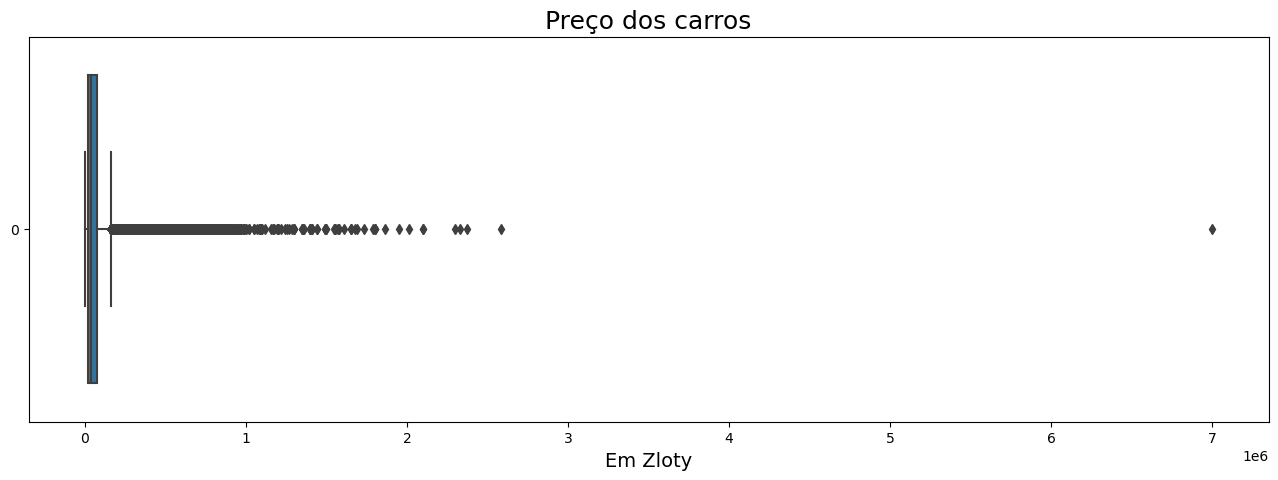

In [18]:
ax = sns.boxplot(data = dados['Preco'], orient = 'h')
ax.figure.set_size_inches(16, 5)
ax.set_title('Preço dos carros', fontsize = 18)
ax.set_xlabel('Em Zloty', fontsize = 14)
ax;

In [19]:
dados.Preco.max()

6999000

In [20]:
df.loc[df['Price'] == 6999000]

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
32304,32304,6999000,PLN,Used,BMW,X3,NaN,F25 (2010-),2014,238000.0,...,Automatic,SUV,5.0,silver,NaN,NaN,NaN,04/05/2021,"ŁYSKOWSKIEGO, 55B - 86-300 Grudziądz, Kujawsko...","['ABS', 'Central locking', 'Electric rear wind..."


Deletando o maior outlier

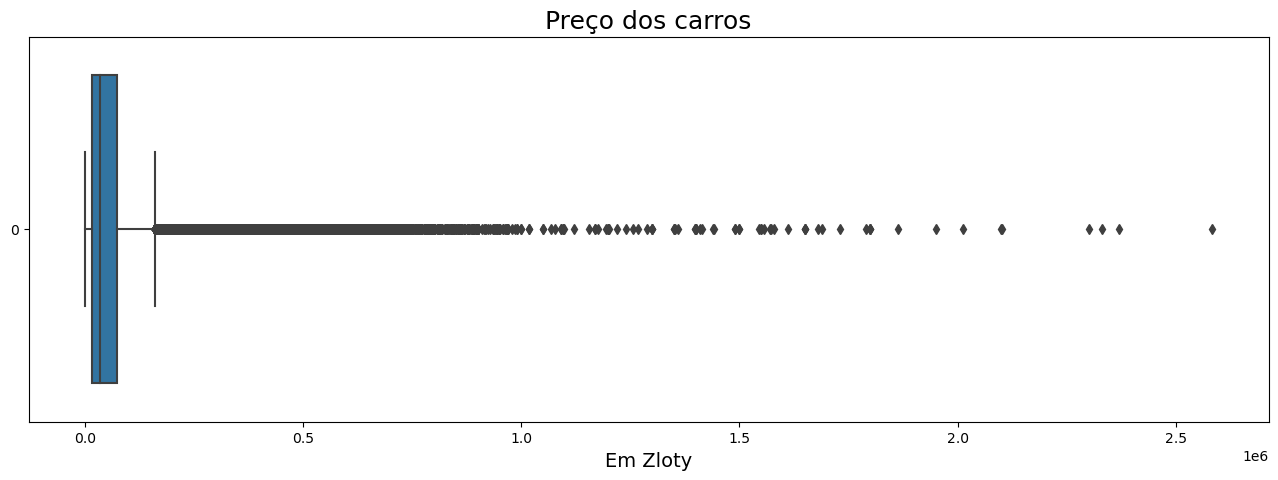

In [21]:
dados = dados.drop(dados['Preco'].idxmax())

ax = sns.boxplot(data = dados['Preco'], orient = 'h')
ax.figure.set_size_inches(16, 5)
ax.set_title('Preço dos carros', fontsize = 18)
ax.set_xlabel('Em Zloty', fontsize = 14)
ax;

# Distribuição de frequências

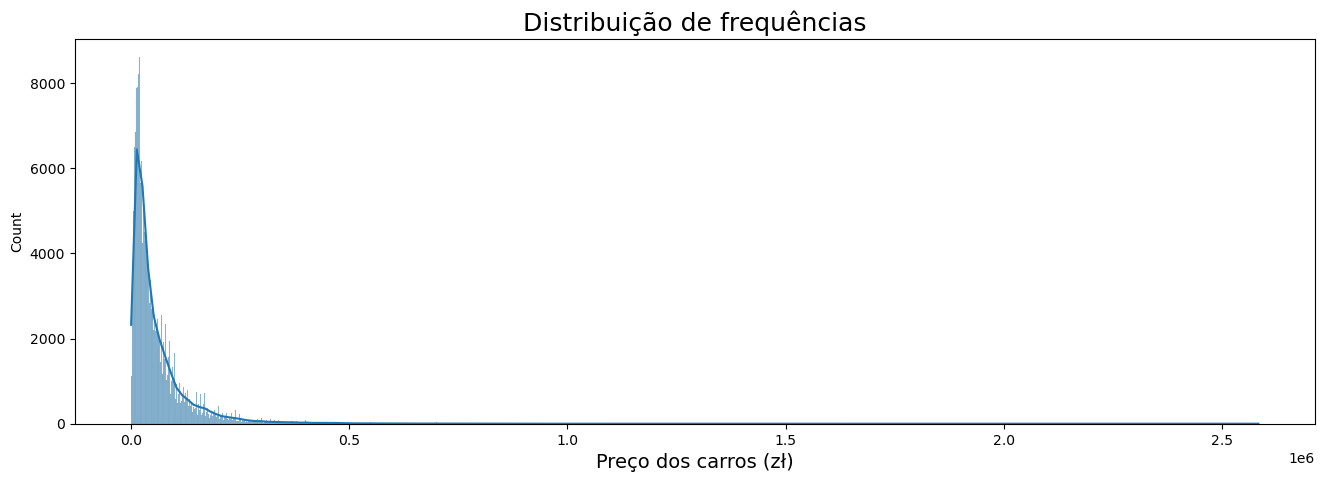

In [22]:
ax = sns.histplot(dados['Preco'], kde = True)
ax.figure.set_size_inches(16, 5)
ax.set_title('Distribuição de frequências', fontsize = 18)
ax.set_xlabel('Preço dos carros (zł)', fontsize = 14)
ax;

# Dispersão entre as variáveis

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


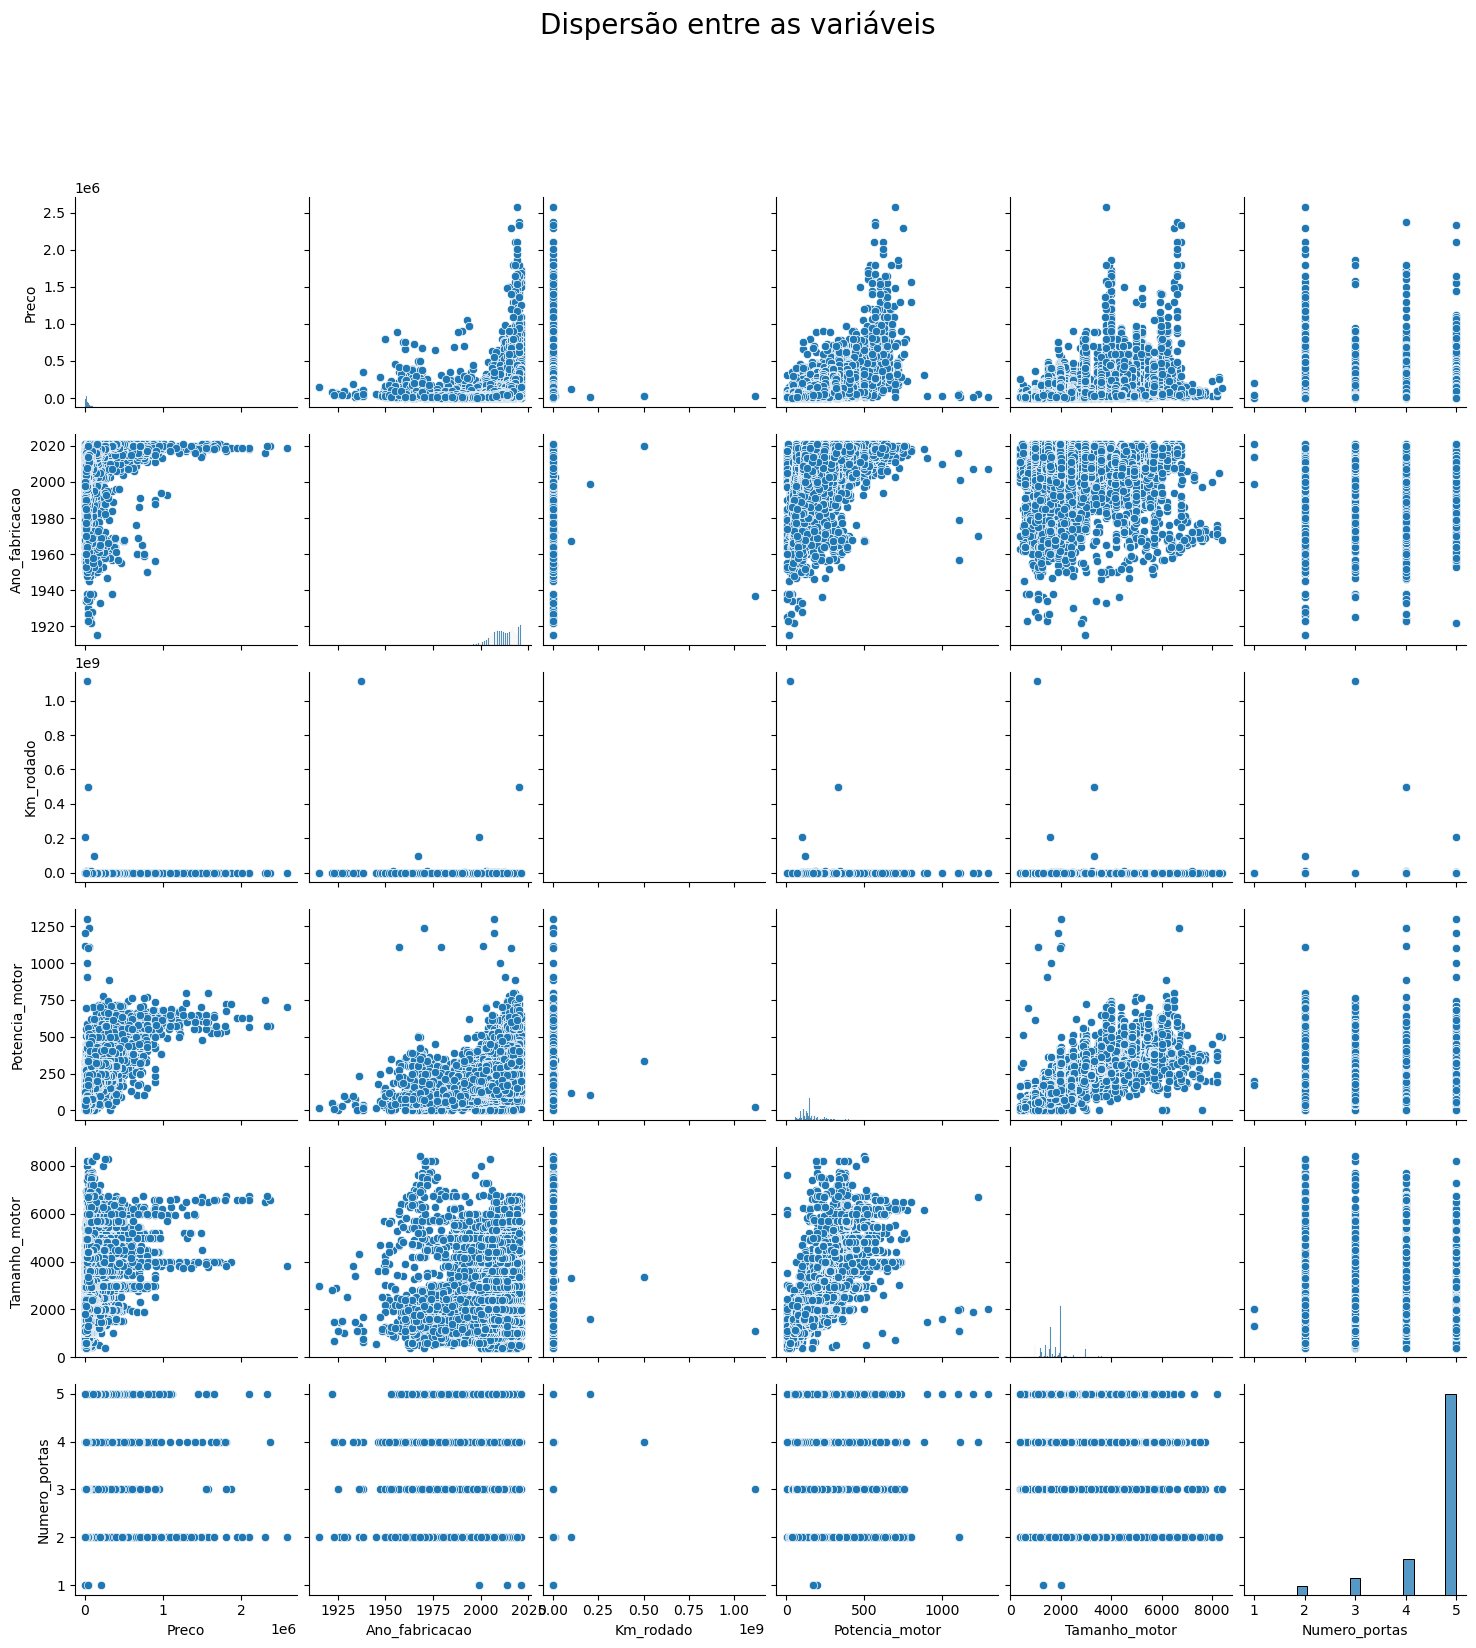

In [23]:
ax = sns.pairplot(dados)
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.1)
ax;

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


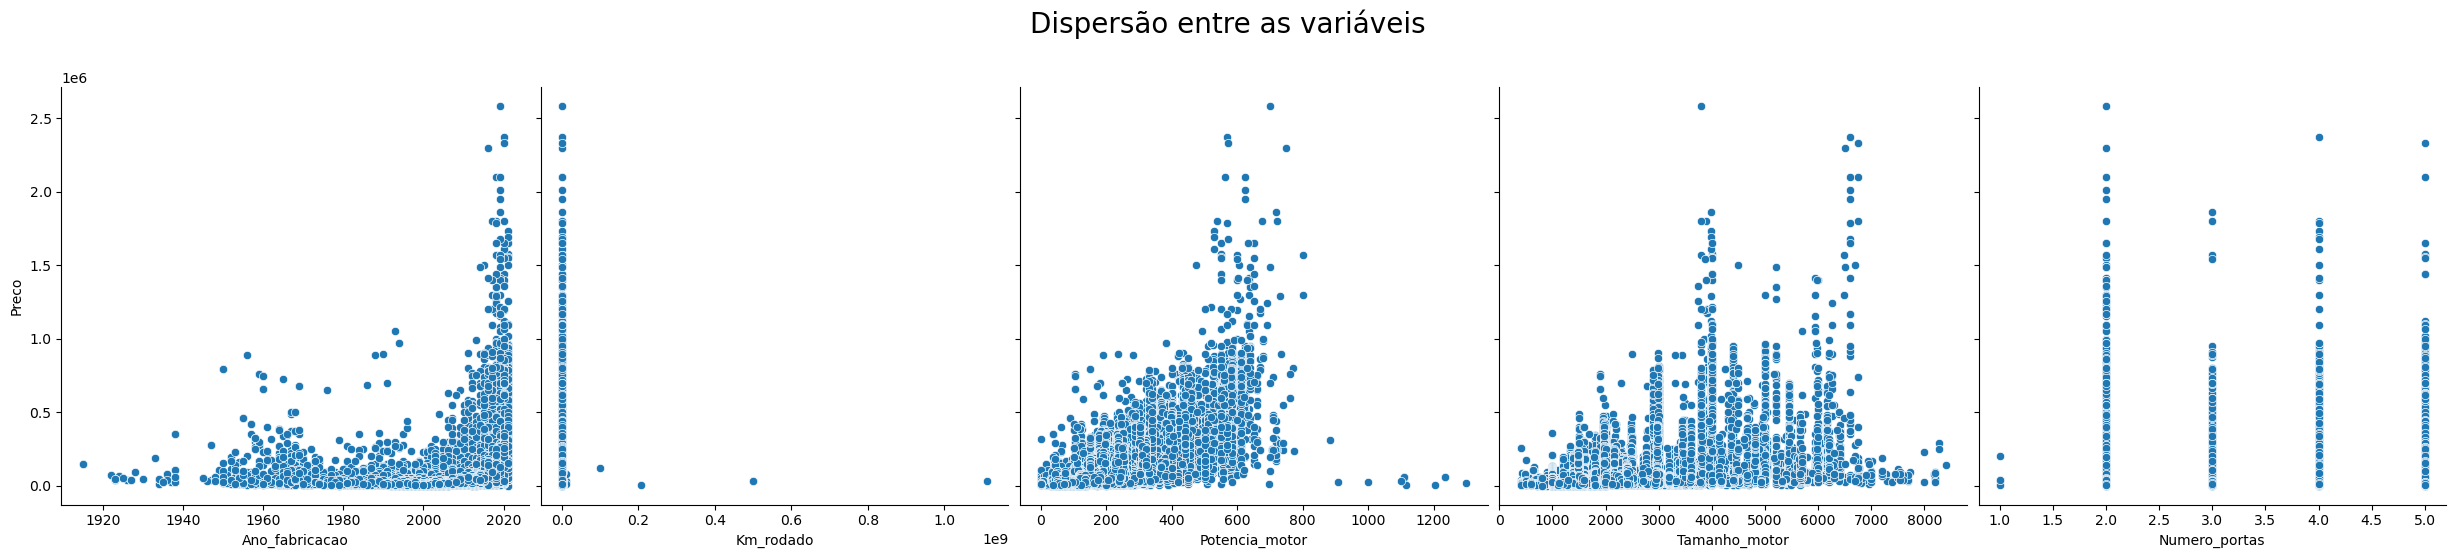

In [24]:
ax = sns.pairplot(dados, y_vars = 'Preco', x_vars = ['Ano_fabricacao', 'Km_rodado', 'Potencia_motor', 'Tamanho_motor', 'Numero_portas'], 
                  height = 5)
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.1)
ax;

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


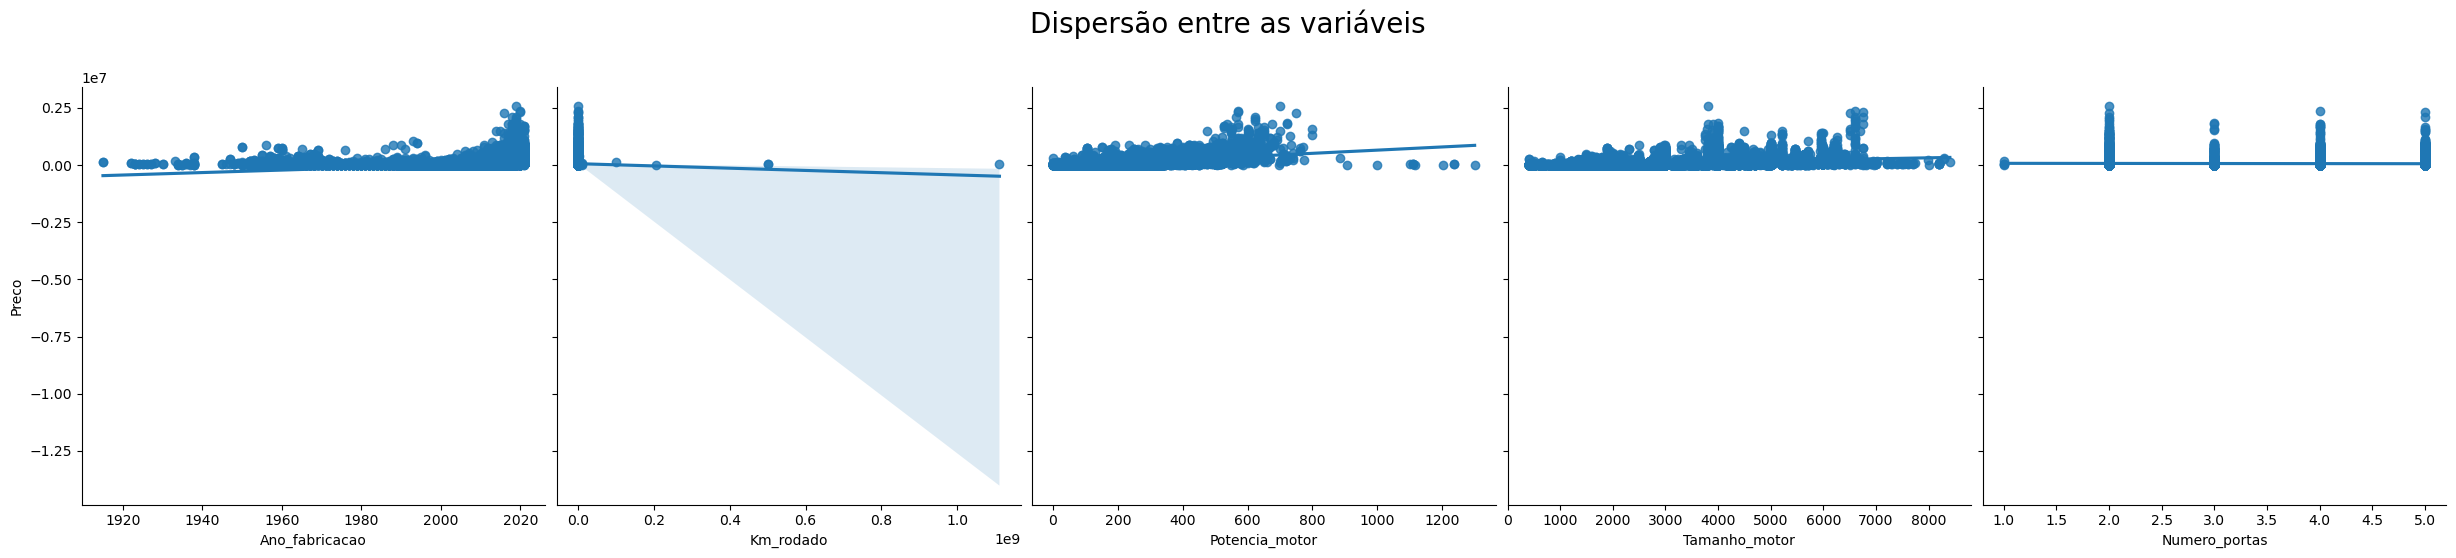

In [25]:
ax = sns.pairplot(dados, y_vars = 'Preco', x_vars = ['Ano_fabricacao', 'Km_rodado', 'Potencia_motor', 'Tamanho_motor', 'Numero_portas'], 
                  height = 5, kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.1)
ax;

# Transformando os dados

In [26]:
np.log(1)

0.0

In [27]:
dados['log_preco'] = np.log(dados['Preco'])
dados['log_fabricacao'] = np.log(dados['Ano_fabricacao'])
dados['log_quilometragem'] = np.log(dados['Km_rodado'])
dados['log_potencia'] = np.log(dados['Potencia_motor'])
dados['log_tamanho_motor'] = np.log(dados['Tamanho_motor'])
dados['log_portas'] = np.log(dados['Numero_portas'])

dados.head()

,Preco,Ano_fabricacao,Km_rodado,Potencia_motor,Tamanho_motor,Numero_portas,log_preco,log_fabricacao,log_quilometragem,log_potencia,log_tamanho_motor,log_portas
0,86200,2021,1.0,145.0,1400.0,3.0,11.364425,7.611348,0.000000,4.976734,7.244228,1.098612
1,43500,1974,59000.0,75.0,1100.0,2.0,10.680516,7.587817,10.985293,4.317488,7.003065,0.693147
2,44900,2018,52000.0,180.0,1368.0,3.0,10.712193,7.609862,10.858999,5.192957,7.221105,1.098612
3,39900,2012,29000.0,160.0,1368.0,3.0,10.594132,7.606885,10.275051,5.075174,7.221105,1.098612
4,97900,2021,600.0,165.0,1368.0,3.0,11.491702,7.611348,6.396930,5.105945,7.221105,1.098612


## Distribuição de frequências da variável *dependente transformada* (y):

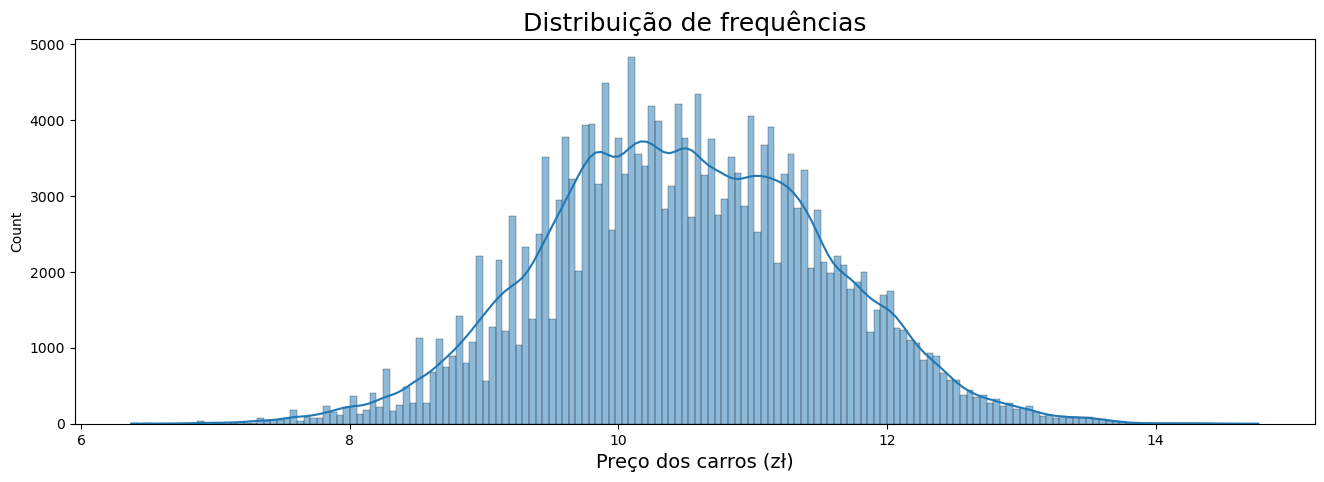

In [28]:
ax = sns.histplot(dados['log_preco'], kde = True)
ax.figure.set_size_inches(16, 5)
ax.set_title('Distribuição de frequências', fontsize = 18)
ax.set_xlabel('Preço dos carros (zł)', fontsize = 14)
ax;

## Verificando relação linear:

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


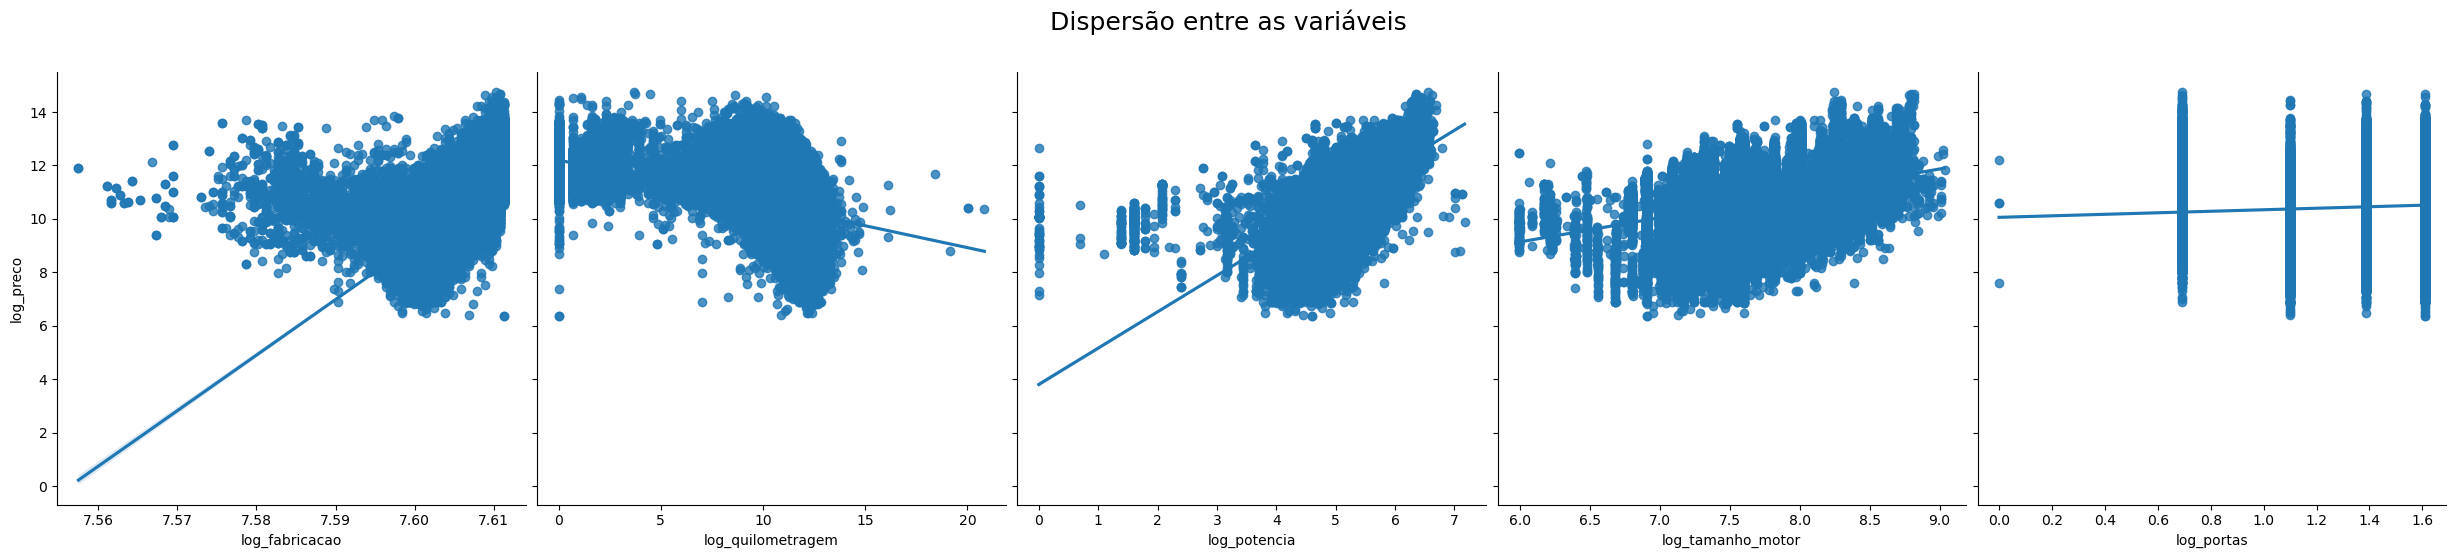

In [29]:
ax = sns.pairplot(dados, y_vars = 'log_preco', x_vars = ['log_fabricacao', 'log_quilometragem', 'log_potencia', 'log_tamanho_motor', 'log_portas'], 
                  height = 5, kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 18, y = 1.1)
ax;

# Criando os datasets de Treino e Teste

## Importando o *train_test_split* da biblioteca *scikit-learn*:

In [30]:
from sklearn.model_selection import train_test_split

## Criando uma Series para armazenar o preço dos carros (y):

In [31]:
y = dados['log_preco']

## Criando um DataFrame para armazenar as variáveis explicativas (X):

In [32]:
X = dados[['log_fabricacao', 'log_quilometragem', 'log_potencia', 'log_portas']]

## Criando os datasets de treino e de teste:

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 9876)
X_train

,log_fabricacao,log_quilometragem,log_potencia,log_portas
36490,7.606387,11.659516,4.430817,1.098612
19914,7.609367,11.617285,5.010635,1.609438
18234,7.604396,11.635143,5.298317,0.693147
145759,7.610853,6.214608,4.510860,1.609438
206669,7.606885,11.944188,5.093750,1.609438
...,...,...,...,...
36839,7.590852,11.492723,5.393628,0.693147
118842,7.606885,11.527814,4.605170,1.609438
73188,7.606885,11.503420,4.454347,1.609438
117973,7.609367,11.927278,4.912655,1.386294


# Regressão linear

## Importando a biblioteca *statsmodels*:

In [34]:
import statsmodels.api as sm

## Estimando o modelo com *statsmodels*:

In [35]:
X_train_com_constante = sm.add_constant(X_train)
X_train_com_constante.head()

,const,log_fabricacao,log_quilometragem,log_potencia,log_portas
36490,1.0,7.606387,11.659516,4.430817,1.098612
19914,1.0,7.609367,11.617285,5.010635,1.609438
18234,1.0,7.604396,11.635143,5.298317,0.693147
145759,1.0,7.610853,6.214608,4.510860,1.609438
206669,1.0,7.606885,11.944188,5.093750,1.609438


# Avaliando o Modelo Estimado

In [36]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_preco   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                 9.979e+04
Date:                Thu, 07 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:12:06   Log-Likelihood:            -1.2468e+05
No. Observations:              152859   AIC:                         2.494e+05
Df Residuals:                  152854   BIC:                         2.494e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1062.1018      3.849   -275.967      0.000   -1069.645   -1054.559
log_fabricacao      140.4942      0.506    277.420      0.000     139.502     141.487
log_quilometragem    -0.0789      0.000   -167.437      0.000      -0.080      -0.078
log_potencia          1.0503      0.003    320.995      0.000       1.044       1.057
log_portas           -0.3131      0.007    -44.552      0.000      -0.327      -0.299
==============================================================================
Omnibus:                   108492.501   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7562089.786
Skew:                           2.761   Prob(JB):                         0.00
Kurtosis:                      37.012   Cond. No.                     3.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Modificando o Modelo e avaliando novamente o ajuste

In [37]:
X = dados[['log_fabricacao', 'log_quilometragem', 'log_potencia', 'log_tamanho_motor', 'log_portas']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 9876)

X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_preco   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 8.193e+04
Date:                Thu, 07 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:12:06   Log-Likelihood:            -1.2324e+05
No. Observations:              152859   AIC:                         2.465e+05
Df Residuals:                  152853   BIC:                         2.466e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1156.7398      4.19

# Estimando o Modelo com os Dados de Treino

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*:

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*:

In [39]:
modelo =  LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train):

In [40]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO:

In [41]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.728


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo":

In [42]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo:

In [43]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.731


# Obtendo previsões pontuais

## Dados de entrada:

In [44]:
entrada = X_test[0:1]
entrada

,log_fabricacao,log_quilometragem,log_potencia,log_tamanho_motor,log_portas
79684,7.604396,12.765688,5.043425,7.695303,1.386294


## Gerando previsão pontual:

In [45]:
modelo.predict(entrada)[0]

10.147597044372105

## Invertendo a transformação para obter a estimativa em Euro:

In [46]:
np.exp(modelo.predict(entrada)[0])

25529.681748490424

## Criando um simulador simples:

In [47]:
Ano_fabricacao = 2015
Km_rodado = 1000
Potencia_motor = 120
Tamanho_motor = 1500
Numero_portas = 2
entrada = [[np.log(Ano_fabricacao), np.log(Km_rodado), np.log(Potencia_motor), np.log(Tamanho_motor), np.log(Numero_portas)]]

print('zł {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

zł 64666.91


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
Ano_fabricacao = 2019
Km_rodado = 15000
Potencia_motor = 180
Tamanho_motor = 2000
Numero_portas = 2
entrada = [[np.log(Ano_fabricacao), np.log(Km_rodado), np.log(Potencia_motor), np.log(Tamanho_motor), np.log(Numero_portas)]]

print('zł {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

zł 108645.56


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
Ano_fabricacao = 2020
Km_rodado = 185000
Potencia_motor = 150
Tamanho_motor = 1000
Numero_portas = 4
entrada = [[np.log(Ano_fabricacao), np.log(Km_rodado), np.log(Potencia_motor), np.log(Tamanho_motor), np.log(Numero_portas)]]

print('zł {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

zł 49078.17


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Interpretação dos coeficientes estimados

In [50]:
modelo.intercept_

-1156.7398004495187

In [51]:
np.exp(modelo.intercept_)

0.0

In [52]:
modelo.coef_

array([ 1.52674994e+02, -8.27336178e-02,  7.61160272e-01,  4.57058552e-01,
       -2.98407114e-01])

In [53]:
X.columns

Index(['log_fabricacao', 'log_quilometragem', 'log_potencia',
       'log_tamanho_motor', 'log_portas'],
      dtype='object')

In [54]:
index = ['Intercepto','log_fabricacao', 'log_quilometragem', 'log_potencia', 'log_tamanho_motor', 'log_portas']

In [55]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
Intercepto,-1156.739800
log_fabricacao,152.674994
log_quilometragem,-0.082734
log_potencia,0.761160
log_tamanho_motor,0.457059
log_portas,-0.298407


# Análise gráfica

In [56]:
y_previsto_train = modelo.predict(X_train)

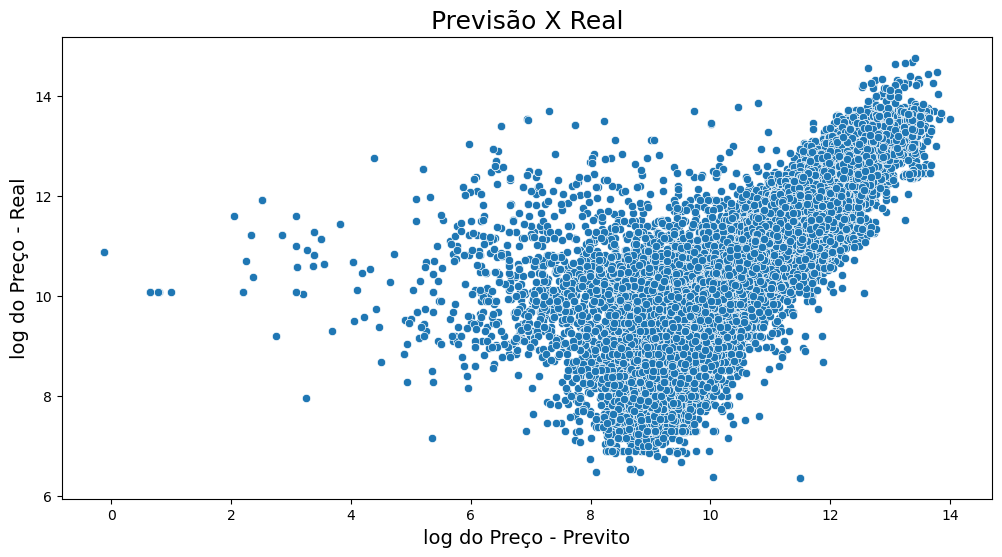

In [58]:
ax = sns.scatterplot(x = y_previsto_train, y = y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize = 18)
ax.set_xlabel('log do Preço - Previto', fontsize = 14)
ax.set_ylabel('log do Preço - Real', fontsize = 14)
ax;